In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Ross_Extent = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Ross_Extent)
fp.date_time(Ross_Extent)

,Extent,Date
0,1040455.516,1979-01-01
1,239334.118,1979-02-01
2,557365.154,1979-03-01
3,2054855.924,1979-04-01
4,2973925.625,1979-05-01
...,...,...
533,3137598.938,2023-06-01
534,3201783.453,2023-07-01
535,2973294.266,2023-08-01
536,3354839.711,2023-09-01


In [5]:
scaler = MinMaxScaler()
Ross_Extent['Extent'] = scaler.fit_transform(Ross_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Ross_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Ross_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.3751 - root_mean_squared_error: 0.6125

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 6s 72ms/step - loss: 0.3718 - root_mean_squared_error: 0.6098 - val_loss: 0.3407 - val_root_mean_squared_error: 0.5837
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.3071 - root_mean_squared_error: 0.5542

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.3050 - root_mean_squared_error: 0.5523 - val_loss: 0.2749 - val_root_mean_squared_error: 0.5243
Epoch 3/50
46/53 [=========================>....] - ETA: 0s - loss: 0.2617 - root_mean_squared_error: 0.5116

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.2558 - root_mean_squared_error: 0.5057 - val_loss: 0.2213 - val_root_mean_squared_error: 0.4704
Epoch 4/50
45/53 [========================>.....] - ETA: 0s - loss: 0.2177 - root_mean_squared_error: 0.4666

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.2121 - root_mean_squared_error: 0.4606 - val_loss: 0.1770 - val_root_mean_squared_error: 0.4207
Epoch 5/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1777 - root_mean_squared_error: 0.4215

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.1743 - root_mean_squared_error: 0.4175 - val_loss: 0.1413 - val_root_mean_squared_error: 0.3760
Epoch 6/50
44/53 [=======================>......] - ETA: 0s - loss: 0.1494 - root_mean_squared_error: 0.3866

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.1411 - root_mean_squared_error: 0.3757 - val_loss: 0.1151 - val_root_mean_squared_error: 0.3393
Epoch 7/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1091 - root_mean_squared_error: 0.3303

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1112 - root_mean_squared_error: 0.3335 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3101
Epoch 8/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0901 - root_mean_squared_error: 0.3002

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0889 - root_mean_squared_error: 0.2982 - val_loss: 0.0771 - val_root_mean_squared_error: 0.2777
Epoch 9/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0701 - root_mean_squared_error: 0.2647

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0690 - root_mean_squared_error: 0.2627 - val_loss: 0.0577 - val_root_mean_squared_error: 0.2403
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0502 - root_mean_squared_error: 0.2242

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0508 - root_mean_squared_error: 0.2255 - val_loss: 0.0413 - val_root_mean_squared_error: 0.2033
Epoch 11/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0401 - root_mean_squared_error: 0.2003

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0386 - root_mean_squared_error: 0.1965 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1845
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0319 - root_mean_squared_error: 0.1786

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0307 - root_mean_squared_error: 0.1751 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1561
Epoch 13/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0261 - root_mean_squared_error: 0.1615

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0259 - root_mean_squared_error: 0.1610 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1310
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1545

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0219 - root_mean_squared_error: 0.1481 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1187
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1297

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0167 - root_mean_squared_error: 0.1292 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1099
Epoch 16/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 17/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1241

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0153 - root_mean_squared_error: 0.1235 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218
Epoch 19/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.1235

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0144 - root_mean_squared_error: 0.1199 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1006
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0972
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 23/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0982

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0097 - root_mean_squared_error: 0.0984 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0869
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1134
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 26/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1115

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0860
Epoch 27/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 28/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.0969

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0102 - root_mean_squared_error: 0.1012 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0824
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0854
Epoch 30/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0966
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0128 - root_mean_squared_error: 0.1132 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0874
Epoch 32/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0978
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0140 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 35/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1004 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982
Epoch 36/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 37/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 38/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1091
Epoch 39/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.0926

INFO:tensorflow:Assets written to: Ross_model_LT2\assets


INFO:tensorflow:Assets written to: Ross_model_LT2\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0095 - root_mean_squared_error: 0.0974 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 40/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0099 - root_mean_squared_error: 0.0996 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834
Epoch 41/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 42/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 43/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0875
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0136 - root_mean_squared_error: 0.1165 - val_loss: 0.0084 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.3970993240674336 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

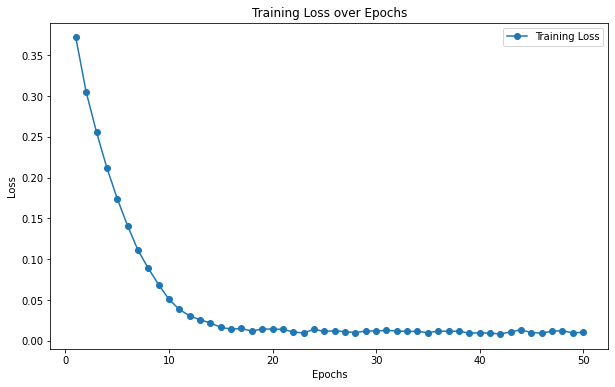

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

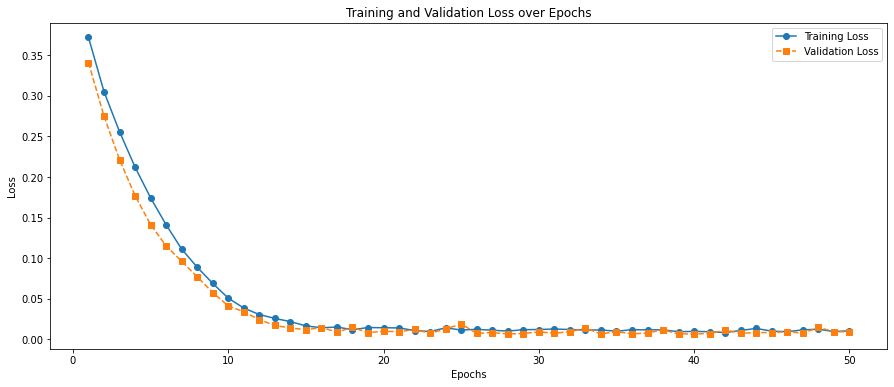

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Ross_model_LT2/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07990971888002724
MAE : 0.05848628242020526


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.123277e+06,3168444.759
1,3.333202e+06,3656196.531
2,3.954489e+06,3794128.369
3,3.911157e+06,3885746.442
4,3.909462e+06,3909211.179
5,3.372478e+06,3499167.351
6,2.360161e+06,2715890.297
7,1.018057e+06,1053272.694
8,3.462820e+05,368862.123
9,5.837485e+05,979418.298


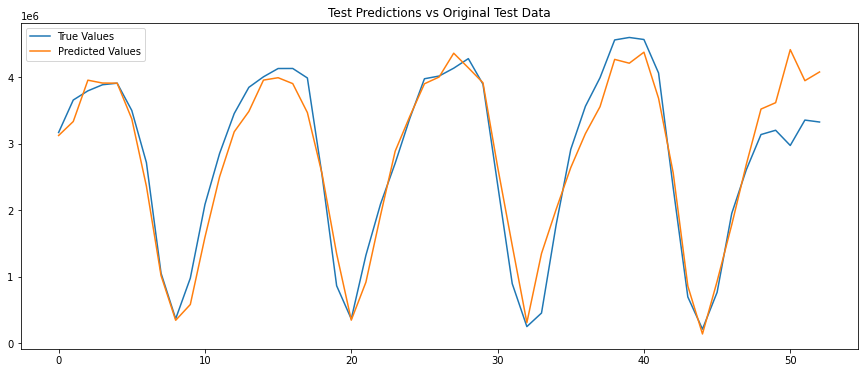

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

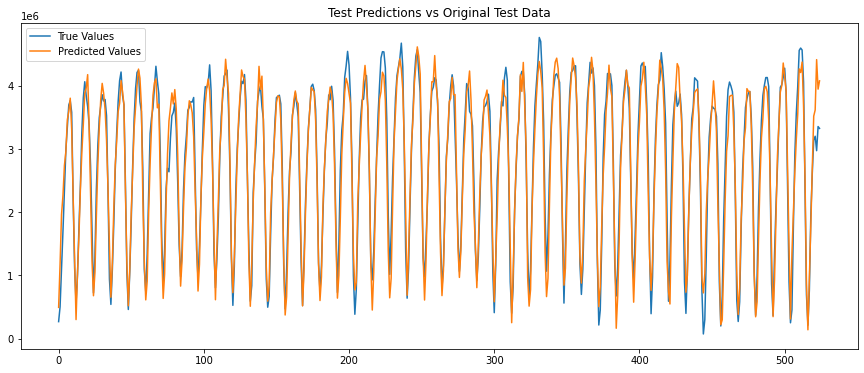

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()